# Exercise 1



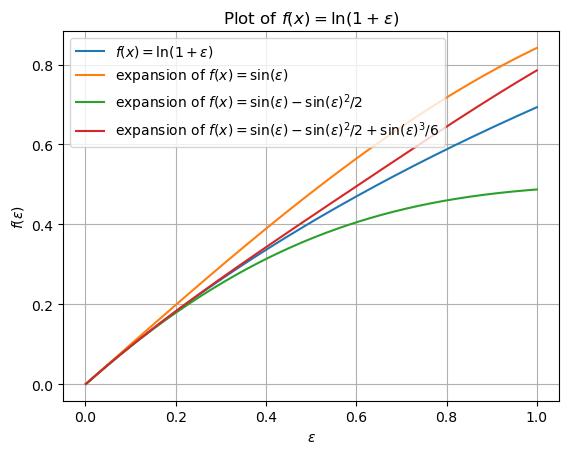

In [11]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt

# Define the function
f = sp.ln(1 + epsilon)

# Convert the sympy function to a numpy function
f_np = sp.lambdify(epsilon, f, 'numpy')

# Generate values for epsilon
epsilon_values = np.linspace(0.001, 1, 400)
f_values = f_np(epsilon_values)

f_expan1=sp.sin(epsilon)#-sp.sin(epsilon)**2/2+sp.sin(epsilon)**3/2
f_expan2=sp.sin(epsilon)-sp.sin(epsilon)**2/2
f_expan3=sp.sin(epsilon)-sp.sin(epsilon)**2/2+sp.sin(epsilon)**3/2

f_exp_1 = sp.lambdify(epsilon, f_expan1, 'numpy')
f_exp_2 = sp.lambdify(epsilon, f_expan2, 'numpy')
f_exp_3 = sp.lambdify(epsilon, f_expan3, 'numpy')
f_exp_v1 = f_exp_1(epsilon_values)
f_exp_v2 = f_exp_2(epsilon_values)
f_exp_v3 = f_exp_3(epsilon_values)

# Plot the function
plt.plot(epsilon_values, f_values, label='$f(x) = \ln(1 + \epsilon)$')
plt.plot(epsilon_values, f_exp_v1, label='expansion of $f(x) = \sin(\epsilon)$')
plt.plot(epsilon_values, f_exp_v2, label='expansion of $f(x) = \sin(\epsilon)-\sin(\epsilon)^2/2$')
plt.plot(epsilon_values, f_exp_v3, label='expansion of $f(x) = \sin(\epsilon)-\sin(\epsilon)^2/2+\sin(\epsilon)^3/6$')

plt.xlabel('$\epsilon$')
plt.ylabel('$f(\epsilon)$')
plt.title('Plot of $f(x) = \ln(1 + \epsilon)$')
plt.legend()
plt.grid(True)
plt.show()

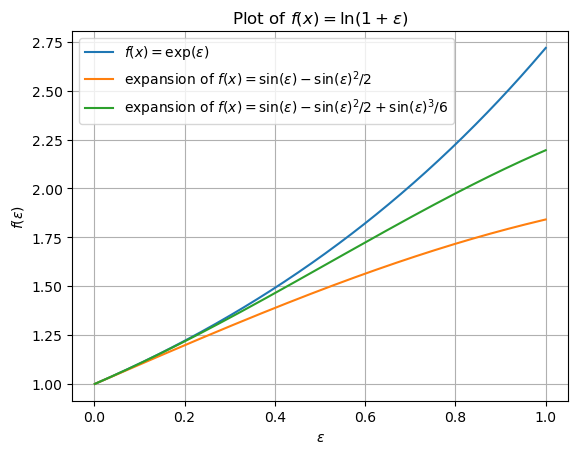

In [16]:

# Define the function
f = sp.exp(epsilon)

# Convert the sympy function to a numpy function
f_np = sp.lambdify(epsilon, f, 'numpy')

# Generate values for epsilon
epsilon_values = np.linspace(0.001, 1, 400)
f_values = f_np(epsilon_values)

f_expan1=1
f_expan2=1+sp.sin(epsilon)
f_expan3=1+sp.sin(epsilon)+sp.sin(epsilon)**2/2

f_exp_1 = sp.lambdify(epsilon, f_expan1, 'numpy')
f_exp_2 = sp.lambdify(epsilon, f_expan2, 'numpy')
f_exp_3 = sp.lambdify(epsilon, f_expan3, 'numpy')
f_exp_v1 = f_exp_1(epsilon_values)
f_exp_v2 = f_exp_2(epsilon_values)
f_exp_v3 = f_exp_3(epsilon_values)

# Plot the function
plt.plot(epsilon_values, f_values, label='$f(x) = \exp(\epsilon)$')
#plt.plot(epsilon_values, f_exp_v1, label='expansion of $f(x) = \sin(\epsilon)$')
plt.plot(epsilon_values, f_exp_v2, label='expansion of $f(x) = \sin(\epsilon)-\sin(\epsilon)^2/2$')
plt.plot(epsilon_values, f_exp_v3, label='expansion of $f(x) = \sin(\epsilon)-\sin(\epsilon)^2/2+\sin(\epsilon)^3/6$')

plt.xlabel('$\epsilon$')
plt.ylabel('$f(\epsilon)$')
plt.title('Plot of $f(x) = \ln(1 + \epsilon)$')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 3

In [21]:
from scipy.integrate import solve_ivp

# Define the time variable
time = np.linspace(0, 10, 100)

# Define the eps_use variable
eps_use = 0.1

def rhs(t, u, eps):
    x, y = u
    x_dot = y
    y_dot = -x + eps * x * y**2
    return [x_dot, y_dot]

sol = solve_ivp(rhs, [0, np.max(time)], [1, 0], t_eval=time, args=([eps_use]))

In [22]:
def exp_sol(t, eps):
    tau=t*(1-eps/8+3*eps**2/256)
    return np.cos(tau)+eps*(np.cos(3*tau)-np.cos(tau))/32

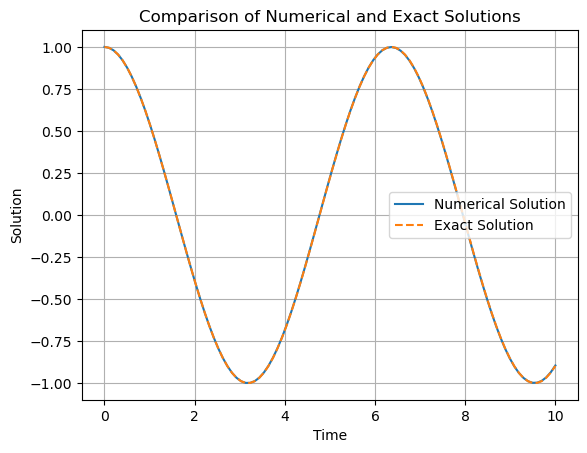

In [23]:
# Evaluate the exact solution using exp_sol
exact_solution = exp_sol(time, eps_use)

# Plot the numerical solution and the exact solution
plt.plot(time, sol.y[0], label='Numerical Solution')
plt.plot(time, exact_solution, label='Exact Solution', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Solution')
plt.title('Comparison of Numerical and Exact Solutions')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_77023/2510118529.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


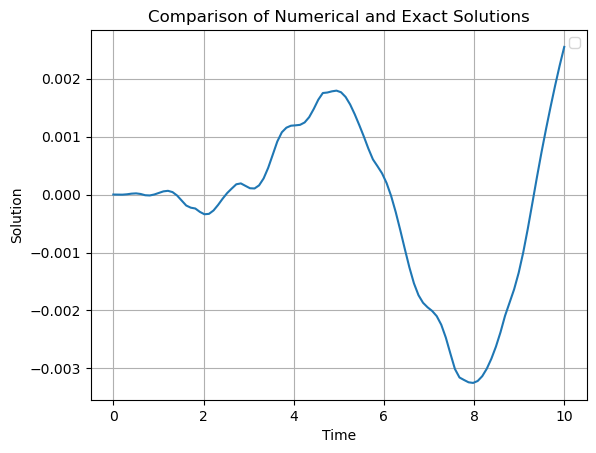

In [28]:
plt.plot(time, sol.y[0]- exact_solution, )

plt.xlabel('Time')
plt.ylabel('Solution')
plt.title('Comparison of Numerical and Exact Solutions')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
%%time
sol = solve_ivp(rhs, [0, np.max(time)], [1, 0], t_eval=time, args=([eps_use]))
print("Time taken:", sol.message)

Time taken: The solver successfully reached the end of the integration interval.
CPU times: user 2.97 ms, sys: 2.05 ms, total: 5.02 ms
Wall time: 3.53 ms


ValueError: x and y must have same first dimension, but have shapes (100,) and (99,)

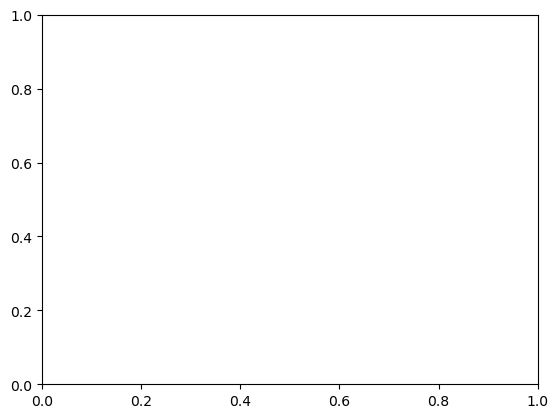

In [33]:
%%time
exact_solution = exp_sol(time, eps_use)
#plot(time, exact_solution)
plt.plot(time, np.diff(exact_solution), label='Difference of Exact Solution')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('Difference of Exact Solution Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
%pip install tensorflow
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate dummy time series data
def generate_time_series(n_steps):
    return np.sin(np.linspace(0, 100, n_steps))

# Prepare the data
n_steps = 100
series = generate_time_series(n_steps)
X = []
y = []
n_input = 10

for i in range(len(series) - n_input):
    X.append(series[i:i + n_input])
    y.append(series[i + n_input])

X = np.array(X)
y = np.array(y)

# Reshape data for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=200, verbose=0)

# Make a prediction
x_input = series[-n_input:].reshape((1, n_input, 1))
yhat = model.predict(x_input, verbose=0)
print(f"Predicted next value: {yhat[0][0]}")

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
   ━━

/Users/guttorm/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Predicted next value: 0.43823519349098206
